# 1. Setup and get data

In [1]:
pip --version

pip 23.2.1 from c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip (python 3.11)

Note: you may need to restart the kernel to use updated packages.


## 1.1 Install dependencies

In [2]:
pip install tensorflow opencv-python matplotlib albumentations


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1.2 collect images using openCV

In [3]:
import os
import time
import uuid
import cv2
import shutil

In [4]:
# Creating a path to store images
IMAGES_PATH = os.path.join('data', 'images')
number_images = 2
IMAGES_PATH

'data\\images'

In [5]:
cap = cv2.VideoCapture(0) # calling the function to capture images
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum+1))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,'{}.jpg'.format(str(uuid.uuid1())))
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## 1.3 Annotate images with LabelMe

In [6]:
pip install labelme

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
#!labelme
#conda create --name=labelme python=3
#conda activate labelme
#pip install labelme

# If this is not working, you can download the standalone app from:
# https://github.com/wkentaro/labelme/releases


# 2. Review dataset and build Image Loading function

## 2.1 Import TF and deps

In [7]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [8]:
print(tf.__version__)

2.13.0


## 2.2 Load images into TF data pipeline

In [9]:
images = tf.data.Dataset.list_files('/DoAn/face_detection/data/images/*.jpg', shuffle = False)

In [10]:
images.as_numpy_iterator().next()

b'\\DoAn\\face_detection\\data\\images\\000001.jpg'

In [11]:
images

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [12]:
def load_image(x):
    byte_image = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_image)
    return img

In [13]:
images = images.map(load_image)

In [14]:
images.as_numpy_iterator().next()

array([[[251, 232, 192],
        [251, 232, 192],
        [251, 232, 192],
        ...,
        [245, 227, 215],
        [254, 237, 221],
        [253, 238, 219]],

       [[251, 232, 192],
        [251, 232, 192],
        [251, 232, 192],
        ...,
        [247, 229, 217],
        [254, 238, 222],
        [254, 239, 220]],

       [[251, 232, 192],
        [251, 232, 192],
        [251, 232, 192],
        ...,
        [249, 231, 219],
        [254, 238, 222],
        [254, 239, 220]],

       ...,

       [[140,  74,  24],
        [114,  48,   0],
        [144,  77,  32],
        ...,
        [120,  55,  27],
        [122,  57,  29],
        [121,  57,  29]],

       [[128,  62,  14],
        [136,  70,  22],
        [165,  97,  52],
        ...,
        [115,  48,  19],
        [118,  51,  22],
        [117,  52,  22]],

       [[166, 100,  52],
        [203, 137,  89],
        [244, 176, 131],
        ...,
        [117,  48,  19],
        [118,  51,  22],
        [118,  51,  22]]

In [15]:
images

<_MapDataset element_spec=TensorSpec(shape=(None, None, None), dtype=tf.uint8, name=None)>

In [16]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [17]:
len(images)

19

## 2.4 view raw images with matplotlib

In [18]:
image_generator = images.batch(4)
image_generator = image_generator.as_numpy_iterator()

In [19]:
plot_images = image_generator.next()

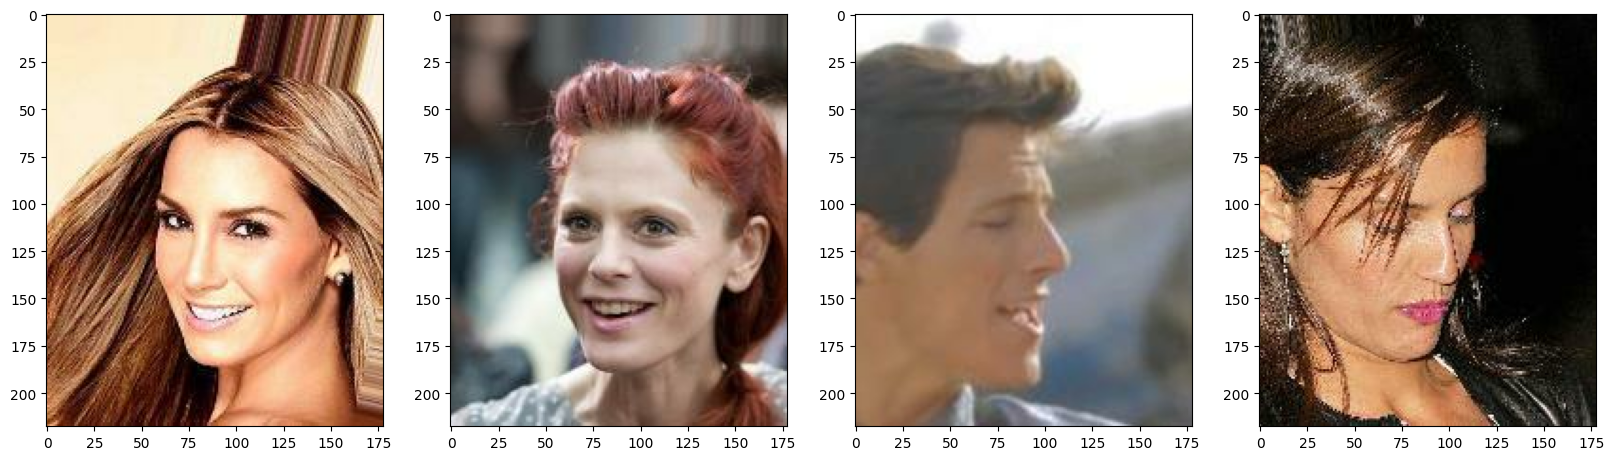

In [20]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for index, image in enumerate(plot_images):
    ax[index].imshow(image)
plt.show()

# 3. Partition Unaugmented Data

## 3.1 Manually split data into train and test data

In [21]:
# 70% 63
# 15% 14 and 13

## 3.2 Move the matching labels

In [22]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        filename = file.split('.')[0] + '.json'
        
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

In [24]:
# for folder in ['train', 'test', 'val']:
#     #print("Processing folder:", folder)
#     for file in os.listdir(os.path.join('data', folder, 'images')): #duyệt qua tất cả các tệp tin trong thư mục 'data/{folder}/images'. folder là một trong các giá trị 'train', 'test', hoặc 'val', và 'data/{folder}/images' là đường dẫn đầy đủ đến thư mục chứa tệp tin hình ảnh của từng tập dữ liệu.
#         #print("Processing file:", file)
#         filename = file.split('.')[0] + '.json' #Tách tên tệp tin từ phần mở rộng của nó và thay thế phần mở rộng .jpg bằng .json. Kết quả sẽ là tên tệp tin mới với phần mở rộng .json.
#         #print("Modified filename:", filename)
        
#         destination_dir = os.path.join('data', 'labels')
#         destination_filepath = os.path.join(destination_dir, filename)
#         source_filepath = os.path.join('data', folder, 'images', file)
#         os.makedirs(destination_dir, exist_ok=True)
#         shutil.copy(source_filepath, destination_filepath)

#         # # save to json
#         # f = open(filename, 'rb')
#         # img_data = f.read()
#         # f.close()
#         # enc_data = base64.b64encode(img_data)
#         # json.dump({'image':enc_data}, open('c:/out.json', 'w'))
    
#         existing_filepath = os.path.join('data', 'labels', filename) #Xây dựng đường dẫn đầy đủ đến tệp tin .json trong thư mục 'data/labels'.
#         #print("Existing filepath:", existing_filepath)

#         if os.path.exists(existing_filepath): #Kiểm tra xem tệp tin .json có tồn tại trong thư mục 'data/labels' hay không.
#             print("File exists:", existing_filepath)
#             new_filepath = os.path.join('data', folder, 'labels', filename)
#             print("New filepath:", new_filepath)
#             os.replace(existing_filepath, new_filepath)
#             print("File moved.")

# 4. Apply Image augumentation on images and Labels using Albumentations

## 4.1 Setup Albumentations Transform Pipeline

In [23]:
pip install -U albumentations

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import albumentations as alb

In [229]:
augumentor = alb.Compose([alb.RandomCrop(width = 315, height = 315),
                          alb.HorizontalFlip(p = 0.5),
                          alb.RandomBrightnessContrast(p = 0.2),
                          alb.RandomGamma(p = 0.2),
                          alb.RGBShift(p = 0.2),
                          alb.VerticalFlip(p = 0.5)],
                        bbox_params = alb. BboxParams(format = 'albumentations',
                                                      label_fields = ['class_labels']))

## 4.2 Load a test image and annotation with OpenCV and JSON

In [351]:
# img = cv2.imread(r'D:\\DoAn\\face_detection\\data\\images\\dam-vinh-hung-4349-1627457776-3825-1644374417.jpg')
img = cv2.imread(os.path.join('data','train','images', 'dvh2.jpg'))

In [352]:
img.shape

(315, 600, 3)

In [353]:
# with open(r'D:\\DoAn\\face_detection\\m\\dvh.json', 'r') as f:
#     label = json.load(f)
# label['shapes'][0]['points']
with open(os.path.join('data', 'train', 'labels', 'dvh2.json'), 'r') as f:
    label = json.load(f)
label['shapes'][0]['points']

[[157.87037037037035, 0.09259259259261654],
 [429.62962962962956, 239.90740740740742]]

## 4.3 Extract coordinates and rescale to match Image resolution

In [354]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [355]:
coords

[157.87037037037035,
 0.09259259259261654,
 429.62962962962956,
 239.90740740740742]

In [356]:
coords = list(np.divide(coords, [600, 315, 600, 315]))
coords

[0.26311728395061723,
 0.00029394473838925884,
 0.7160493827160492,
 0.7616108171663728]

## 4.4 Apply augumentations and view results

In [357]:
img.shape, coords

((315, 600, 3),
 [0.26311728395061723,
  0.00029394473838925884,
  0.7160493827160492,
  0.7616108171663728])

In [358]:
augumented = augumentor(image = img, bboxes = [coords], class_labels = ['face'])

In [359]:
augumented

{'image': array([[[ 15,  25,  17],
         [  0,   4,   0],
         [  5,  15,   7],
         ...,
         [  0,   5,   0],
         [  0,   7,   2],
         [  0,   7,   2]],
 
        [[ 61,  72,  62],
         [  1,   9,   1],
         [ 16,  24,  16],
         ...,
         [  0,   4,   0],
         [  0,   5,   0],
         [  0,   6,   1]],
 
        [[135, 146, 136],
         [  2,  10,   2],
         [  1,   9,   1],
         ...,
         [  0,   3,   0],
         [  0,   4,   0],
         [  0,   5,   0]],
 
        ...,
 
        [[163, 195, 216],
         [162, 194, 215],
         [164, 196, 217],
         ...,
         [112, 136, 151],
         [ 91, 115, 130],
         [133, 157, 172]],
 
        [[161, 193, 214],
         [164, 196, 217],
         [168, 200, 221],
         ...,
         [ 61,  84,  98],
         [ 60,  83,  97],
         [ 75,  98, 112]],
 
        [[158, 190, 211],
         [162, 194, 215],
         [166, 198, 219],
         ...,
         [ 48,  71,

In [360]:
augumented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [361]:
augumented['bboxes']

[(0.3138741916519694, 0.2383891828336272, 1.0, 0.9997060552616107)]

In [362]:
first_two = augumented['bboxes'][0][:2]
last_two = augumented['bboxes'][0][2:]

first_two, last_two

((0.3138741916519694, 0.2383891828336272), (1.0, 0.9997060552616107))

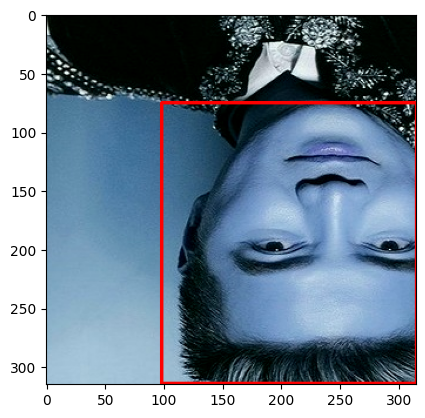

In [363]:
cv2.rectangle(augumented['image'],
            tuple(np.multiply(first_two, [315,315]).astype(int)),
            tuple(np.multiply(last_two, [315,315]).astype(int)),
            (255,0,0), 2)
plt.imshow(augumented['image'])

# 5. Build and Run augumentation pipeline

In [410]:
for partition in ['train', 'test', 'val']:
    for index, image in enumerate(os.listdir(os.path.join('data', partition, 'images'))):
        print(f"{partition} image: ------------------ {index+1}")
        img = cv2.imread(os.path.join('data', partition, 'images', image))
        
        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
                
                coords[0] = label['shapes'][0]['points'][0][0]
                coords[1] = label['shapes'][0]['points'][0][1]
                coords[2] = label['shapes'][0]['points'][1][0]
                coords[3] = label['shapes'][0]['points'][1][1]
                coords = list(np.divide(coords, [600, 315, 600, 315]))
        try:
            for x in range(5):
                augumented = augumentor(image = img, bboxes = [coords], class_labels = ['face'])
                print(f"saving aug image : {x+1}")
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augumented['image'])
                
                annotation = {}
                annotation['image'] = image
                
                if os.path.exists(label_path):
                    if len(augumented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augumented['bboxes'][0]
                        annotation['class'] = 1
                        
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['image'] = 0
                    
                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)
                    
        except Exception as e:
            print(e)

train image: ------------------ 1
saving aug image : 1
saving aug image : 2
saving aug image : 3
saving aug image : 4
saving aug image : 5
train image: ------------------ 2
saving aug image : 1
saving aug image : 2
saving aug image : 3
saving aug image : 4
saving aug image : 5
train image: ------------------ 3
saving aug image : 1
saving aug image : 2
saving aug image : 3
saving aug image : 4
saving aug image : 5
train image: ------------------ 4
saving aug image : 1
saving aug image : 2
saving aug image : 3
saving aug image : 4
saving aug image : 5
train image: ------------------ 5
saving aug image : 1
saving aug image : 2
saving aug image : 3
saving aug image : 4
saving aug image : 5
train image: ------------------ 6
saving aug image : 1
saving aug image : 2
saving aug image : 3
saving aug image : 4
saving aug image : 5
train image: ------------------ 7
saving aug image : 1
saving aug image : 2
saving aug image : 3
saving aug image : 4
saving aug image : 5
train image: --------------

for partition in ['train', 'test', 'val']:
    for label in (os.listdir(os.path.join('aug_data', partition, 'labels'))):
        label_path  = os.path.join('aug_data', partition, 'labels', label)
        print(label_path)
        with open(label_path, 'r') as f:
            label_json = json.load(f)
            if label_json != 0 and label_json != 1:
                print(os.path.join('aug_data', partition, 'labels', label))

## 5.2 Load Augumented images to Tensorflow Dataset

In [411]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg', shuffle = False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [412]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg', shuffle = False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [413]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg', shuffle = False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [414]:
train_images

<_MapDataset element_spec=TensorSpec(shape=(120, 120, None), dtype=tf.float32, name=None)>

In [415]:
train_images.as_numpy_iterator().next()

array([[[0.79774815, 0.8644148 , 0.9271599 ],
        [0.8769608 , 0.93284315, 0.9855392 ],
        [0.90839463, 0.9476103 , 0.986826  ],
        ...,
        [0.72431064, 0.81842834, 0.96744794],
        [0.72761947, 0.8217371 , 0.97075677],
        [0.7269608 , 0.8210784 , 0.970098  ]],

       [[0.8589767 , 0.92915136, 0.9806985 ],
        [0.89033395, 0.9462163 , 0.9916207 ],
        [0.9117953 , 0.951011  , 0.9902267 ],
        ...,
        [0.7290288 , 0.82314646, 0.97216606],
        [0.72817093, 0.82228863, 0.97130823],
        [0.72198224, 0.8160999 , 0.9651195 ]],

       [[0.88722426, 0.9578125 , 0.9997702 ],
        [0.89428616, 0.9535999 , 0.99793196],
        [0.899954  , 0.9396293 , 0.9862132 ],
        ...,
        [0.7254902 , 0.81960785, 0.96862745],
        [0.7257353 , 0.81985295, 0.96887255],
        [0.7252451 , 0.81936276, 0.96838236]],

       ...,

       [[0.81138176, 0.88838845, 0.9828585 ],
        [0.5766851 , 0.6490962 , 0.7488511 ],
        [0.38426778, 0

In [416]:
train_images.as_numpy_iterator().next().shape

(120, 120, 3)

# 6. Prepare Labels

# 6.1 Build label Loading function

In [417]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

## 6.2 Load labels to Tensorflow dataset

In [418]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle = False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [419]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle = False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [420]:
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json', shuffle = False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [421]:
val_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.4202, 0.1017, 1.    , 0.9277], dtype=float16))

# 7. Combine Label and Image Samples

## 7.1 Check Partition Lengths

In [422]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(40, 40, 15, 15, 15, 15)

## 7.2 Create final datasets

In [423]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(3000)
train = train.batch(8)
train = train.prefetch(4)

In [424]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(600)
test = test.batch(8)
test = test.prefetch(4)

In [425]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(600)
val = val.batch(8)
val = val.prefetch(4)

In [426]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8), array([0.   , 0.378, 0.421, 0.995], dtype=float16))

In [427]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.0000e+00, 3.7793e-01, 4.2090e-01, 9.9512e-01],
        [0.0000e+00, 2.9397e-04, 7.7490e-01, 7.6172e-01],
        [1.5222e-01, 3.2330e-03, 7.7832e-01, 7.4707e-01],
        [0.0000e+00, 5.1727e-02, 1.4673e-01, 6.8652e-01],
        [1.5210e-01, 3.7793e-01, 7.4170e-01, 9.9512e-01],
        [0.0000e+00, 2.8394e-01, 4.6582e-01, 9.8193e-01],
        [0.0000e+00, 1.2225e-01, 6.2402e-01, 7.7197e-01],
        [0.0000e+00, 5.1727e-02, 5.0537e-01, 6.8652e-01]], dtype=float16))

## 7.3 View Images and Annotations

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


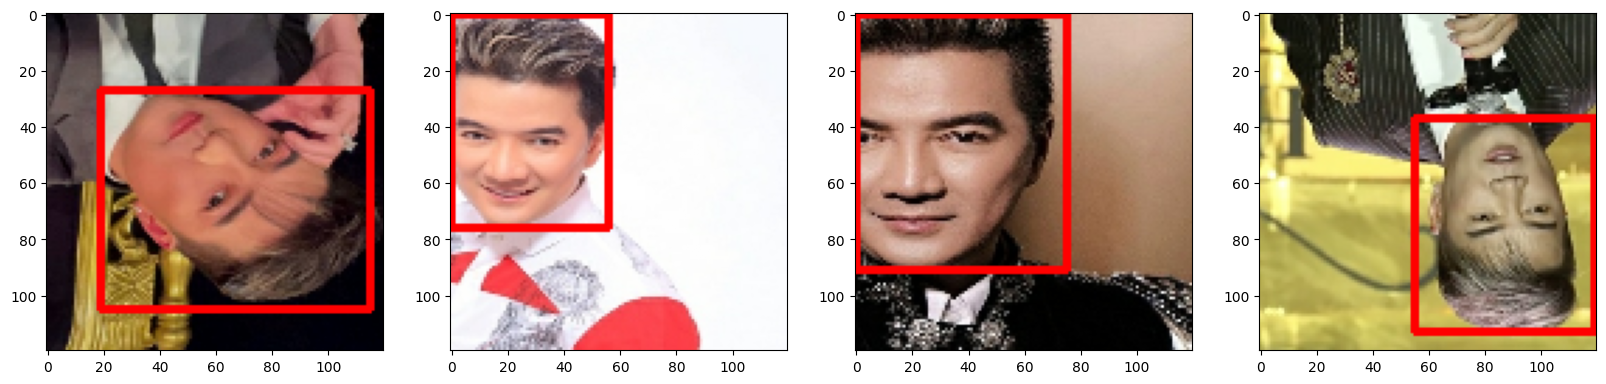

In [428]:
data_samples = train.as_numpy_iterator()
res = data_samples.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [429]:
res[1][0]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

# 8. Build Deep Learning using the functional API

## 8.1 Import layers and Base Network

In [430]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

## 8.2 Download VGG16

In [431]:
vgg = VGG16(include_top = False)

In [432]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

## 8.3 Build intance of Network

In [434]:
def build_model():
    input_layer = Input(shape = (120,120,3))
    
    vgg = VGG16(include_top = False)(input_layer)
    
    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation = 'relu')(f1)
    class2 = Dense(1, activation = 'sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation = 'relu')(f2)
    regress2 = Dense(2048, activation = 'sigmoid')(regress1)
    
    facetracker = Model(inputs = input_layer, outputs = [class2, regress2])
    return facetracker

## 8.4 Test our Neural Network

In [435]:
facetracker = build_model()

In [436]:
facetracker.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_15[0][0]']            
                                                          8                                       
                                                                                                  
 global_max_pooling2d_10 (G  (None, 512)                  0         ['vgg16[0][0]']               
 lobalMaxPooling2D)                                                                               
                                                                                            

In [437]:
X, y = train.as_numpy_iterator().next()

In [438]:
X.shape

(8, 120, 120, 3)

In [439]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 577ms/step


In [440]:
classes, coords

(array([[0.6120432 ],
        [0.6732116 ],
        [0.72790635],
        [0.6928183 ],
        [0.7304237 ],
        [0.6571087 ],
        [0.70637023],
        [0.70013666]], dtype=float32),
 array([[0.44237828, 0.4939507 , 0.5422708 , ..., 0.4667303 , 0.576424  ,
         0.4421891 ],
        [0.42771202, 0.52426326, 0.6453587 , ..., 0.46201438, 0.5474094 ,
         0.42011663],
        [0.39616865, 0.578301  , 0.6816423 , ..., 0.46439776, 0.5464411 ,
         0.36014777],
        ...,
        [0.41753733, 0.5354761 , 0.63041043, ..., 0.47126576, 0.48752552,
         0.3976132 ],
        [0.45000637, 0.598658  , 0.6005459 , ..., 0.39812914, 0.5884194 ,
         0.36310884],
        [0.49608374, 0.5862728 , 0.5692342 , ..., 0.45067388, 0.59950995,
         0.46087706]], dtype=float32))

# 9. define Lossess and Optimizers

## 9.1 Define optimizers and LR

In [441]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 - 1) / batches_per_epoch
lr_decay

0.06666666666666665

In [442]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

## 9.2 Create Localization Loss and Classification Loss

In [444]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
    
    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]
    
    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
    
    return delta_coord + delta_size

In [445]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

## 9.3 Test our Metrics

In [446]:
y[1][:]

array([[0.      , 0.2957  , 0.4458  , 0.8555  ],
       [0.      , 0.05173 , 0.5054  , 0.6865  ],
       [0.1595  , 0.01793 , 0.687   , 0.716   ],
       [0.      , 0.004704, 0.3875  , 0.638   ],
       [0.1521  , 0.378   , 0.7417  , 0.995   ],
       [0.      , 0.05173 , 0.426   , 0.6865  ],
       [0.5205  , 0.378   , 1.      , 0.995   ],
       [0.6987  , 0.3618  , 1.      , 0.995   ]], dtype=float16)

In [447]:
coords

array([[0.44237828, 0.4939507 , 0.5422708 , ..., 0.4667303 , 0.576424  ,
        0.4421891 ],
       [0.42771202, 0.52426326, 0.6453587 , ..., 0.46201438, 0.5474094 ,
        0.42011663],
       [0.39616865, 0.578301  , 0.6816423 , ..., 0.46439776, 0.5464411 ,
        0.36014777],
       ...,
       [0.41753733, 0.5354761 , 0.63041043, ..., 0.47126576, 0.48752552,
        0.3976132 ],
       [0.45000637, 0.598658  , 0.6005459 , ..., 0.39812914, 0.5884194 ,
        0.36310884],
       [0.49608374, 0.5862728 , 0.5692342 , ..., 0.45067388, 0.59950995,
        0.46087706]], dtype=float32)

In [448]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.286978>

In [449]:
y[0]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

In [450]:
classes

array([[0.6120432 ],
       [0.6732116 ],
       [0.72790635],
       [0.6928183 ],
       [0.7304237 ],
       [0.6571087 ],
       [0.70637023],
       [0.70013666]], dtype=float32)

In [451]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.3761686>

In [452]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.286978>

# 10. Train Neural Network

## 10.1 Create Custom Model Class

In [453]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [454]:
model = FaceTracker(facetracker)

In [455]:
model.compile(opt, classloss, regressloss)

## 10.2 Train

In [456]:
logdir = 'logs'

In [457]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [458]:
hist = model.fit(train, epochs = 10, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/10


5/5 [==============================] - 13s 2s/step - total_loss: 2.1196 - class_loss: 0.1800 - regress_loss: 2.0297 - val_total_loss: 1.4271 - val_class_loss: 0.0405 - val_regress_loss: 1.4068
Epoch 2/10
5/5 [==============================] - 13s 3s/step - total_loss: 0.5832 - class_loss: 0.0225 - regress_loss: 0.5719 - val_total_loss: 1.4167 - val_class_loss: 0.0116 - val_regress_loss: 1.4109
Epoch 3/10
5/5 [==============================] - 17s 4s/step - total_loss: 0.4855 - class_loss: 0.0067 - regress_loss: 0.4821 - val_total_loss: 1.5211 - val_class_loss: 0.0038 - val_regress_loss: 1.5192
Epoch 4/10
5/5 [==============================] - 16s 3s/step - total_loss: 0.3783 - class_loss: 0.0041 - regress_loss: 0.3763 - val_total_loss: 1.5595 - val_class_loss: 0.0051 - val_regress_loss: 1.5569
Epoch 5/10
5/5 [==============================] - 23s 4s/step - total_loss: 0.2909 - class_loss: 0.0026 - regress_loss: 0.2897 - val_total_loss: 1.0565 - val_class_loss: 0.0017 - val_regress_loss

## 10.3 Plot Performance

In [459]:
history = hist.history
history

{'total_loss': [0.9174278378486633,
  0.4711249768733978,
  0.46801596879959106,
  0.38233160972595215,
  0.27676448225975037,
  0.19253036379814148,
  0.19339020550251007,
  0.1553824245929718,
  0.06927072256803513,
  0.10308310389518738],
 'class_loss': [0.07253162562847137,
  0.01224176213145256,
  0.002871982753276825,
  0.0037533119320869446,
  0.0037685981951653957,
  0.0011204335605725646,
  0.0014061667025089264,
  0.0008118723053485155,
  0.0003242555249016732,
  0.0002206024364568293],
 'regress_loss': [0.8811620473861694,
  0.4650040864944458,
  0.46657997369766235,
  0.380454957485199,
  0.27488017082214355,
  0.19197013974189758,
  0.19268712401390076,
  0.154976487159729,
  0.06910859793424606,
  0.10297280550003052],
 'val_total_loss': [1.427077054977417,
  1.4166709184646606,
  1.5211269855499268,
  1.5594935417175293,
  1.0564994812011719,
  1.6872001886367798,
  1.123203158378601,
  0.8357831835746765,
  1.2684575319290161,
  0.23585212230682373],
 'val_class_loss': 

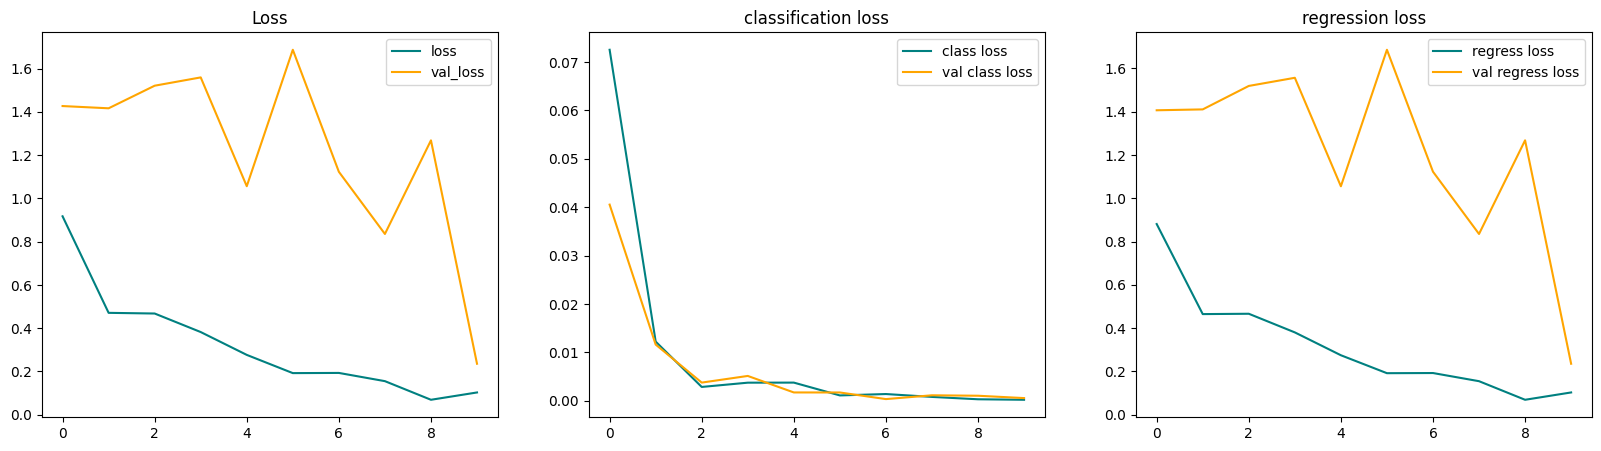

In [460]:
fig, ax = plt.subplots(ncols = 3, figsize = (20,5))

ax[0].plot(history['total_loss'], color = 'teal', label = 'loss')
ax[0].plot(history["val_total_loss"], color = 'orange', label = 'val_loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(history['class_loss'], color = 'teal', label = 'class loss')
ax[1].plot(history['val_class_loss'], color = 'orange', label = "val class loss")
ax[1].title.set_text("classification loss")
ax[1].legend()

ax[2].plot(history['regress_loss'], color = 'teal', label = 'regress loss')
ax[2].plot(history['val_regress_loss'], color = 'orange', label = "val regress loss")
ax[2].title.set_text("regression loss")
ax[2].legend()

plt.show()

# 11. Make Predictions

## 11.1 Make Predictions on Test Set

In [461]:
test_data = test.as_numpy_iterator()

In [462]:
test_sample = test_data.next()

In [463]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 421ms/step


fig, ax = plt.subplots(ncols = 2, figsize = (10,10))
for idx in range(2):
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.6:
        cv2.rectangle(sample_image,
                     tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                     tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                     (255,0,0),2)
        ax[idx].imshow(sample_image)

## 11.2 Save the Model

In [464]:
from tensorflow.keras.models import load_model

In [465]:
facetracker.save('facetracker.h5')

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [466]:
facetracker = load_model('facetracker.h5')

## 11.3 Real Time Detection

In [469]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    # frame = frame[:, :, :]
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    print(yhat[1])
    sample_coords = yhat[1][0]
    print(sample_coords[:2], sample_coords.shape)
    
    if yhat[0] > 0.5:
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [315,315]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [315,315]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [315,315]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [315,315]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [315,315]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 87ms/step
[[0.14976153 0.17078508 0.7373191  ... 0.30188274 0.47207198 0.33651063]]
[0.14976153 0.17078508] (2048,)


ValueError: operands could not be broadcast together with shapes (2046,) (2,) 